# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 19:01:48.319757: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T19:01:51.228191
2025-04-14 19:01:51.228191


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 5
MODEL_TO_USE = 3

# COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
COLUMN_TO_PREDICT = 'IBOVESPA - Close %'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 509
INPUT_WINDOW_SIZE = 4
OUTPUT_WINDOW_SIZE = 1
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 19:01:46"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

IPCA %                        -0.104904
INPC %                        -0.104528
IBOVESPA - Spread             -0.090141
Nasdaq - Spread %             -0.083494
FTSE 100 - Spread             -0.077431
CAC 40 - Spread               -0.075797
Taxa acumulada no período %   -0.072398
STOXX 600 - Spread            -0.070673
FTSE MIB - Spread             -0.070577
STOXX 600 - Spread %          -0.070486
CAC 40 - Spread %             -0.069626
FTSE MIB - Spread %           -0.067484
Dow Jones - Spread            -0.067139
S&P 500 - Spread %            -0.065647
S&P 500 - Spread              -0.065500
DAX - Spread                  -0.061319
Dólar - Spread                -0.056498
Nasdaq - Spread               -0.055014
FTSE 100 - Spread %           -0.054914
Petróleo WTI - Spread         -0.054419
Kospi - Spread %              -0.054199
Shanghai SE - Open %          -0.053242
Petróleo WTI - Spread %       -0.052938
PIB %                         -0.052670
Dow Jones - Spread %          -0.050204


In [11]:
corr.index

Index(['IPCA %', 'INPC %', 'IBOVESPA - Spread', 'Nasdaq - Spread %',
       'FTSE 100 - Spread', 'CAC 40 - Spread', 'Taxa acumulada no período %',
       'STOXX 600 - Spread', 'FTSE MIB - Spread', 'STOXX 600 - Spread %',
       ...
       'S&P 500 - Low %', 'DAX - Close %', 'CAC 40 - Close %',
       'FTSE 100 - Close %', 'Nasdaq - Close %', 'Dow Jones - Close %',
       'S&P 500 - Close %', 'IBOVESPA - Low %', 'IBOVESPA - High %',
       'IBOVESPA - Close %'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >, <Axes: >], dtype=object)

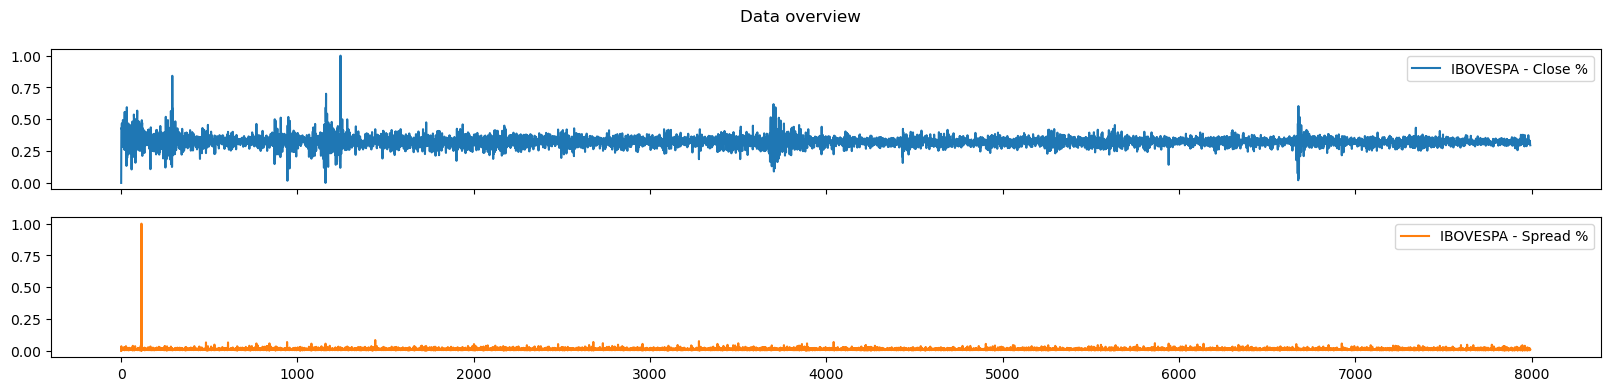

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >, <Axes: >], dtype=object)

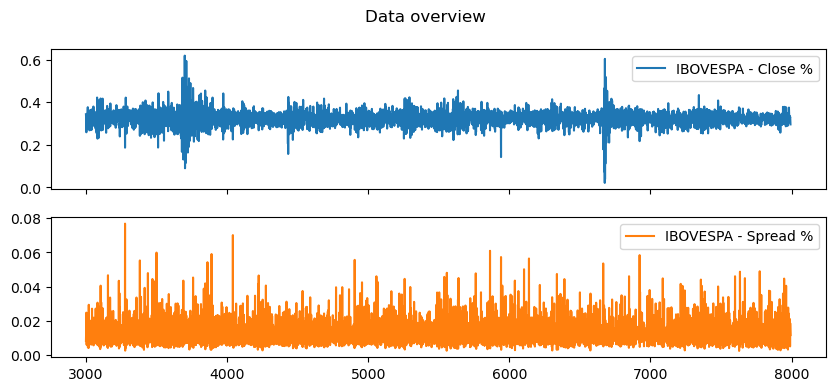

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 1
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Adjusted train size: 7602
Training data size: 7602
Validating data size: 261
Testing data size: 129


array([<Axes: >, <Axes: >], dtype=object)

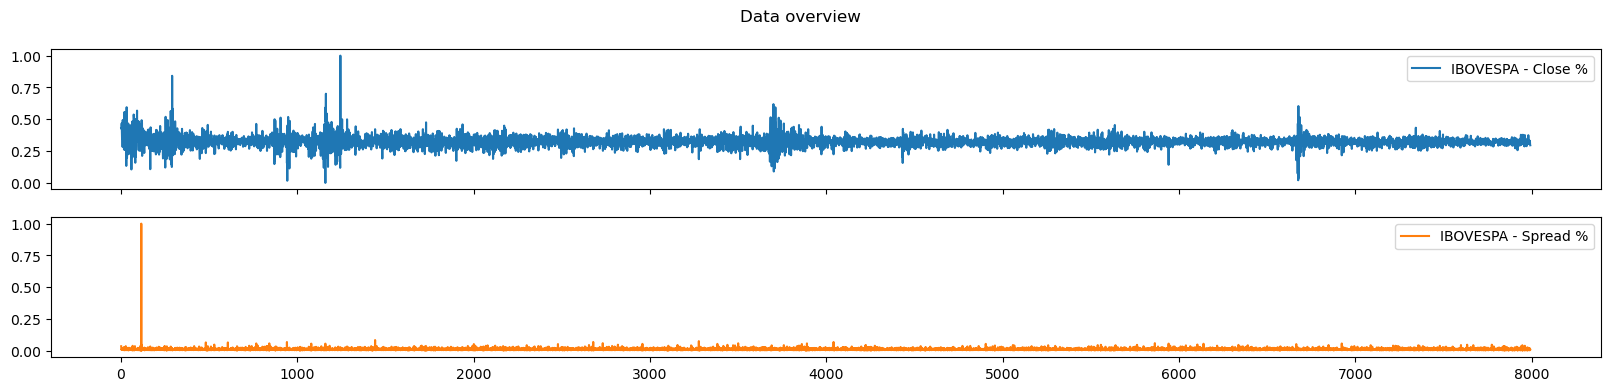

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7602, 261, 129, 7992)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 5
Input indices: [0 1 2 3]
Label indices: [4]
Label column name(s): ['IBOVESPA - Close %']

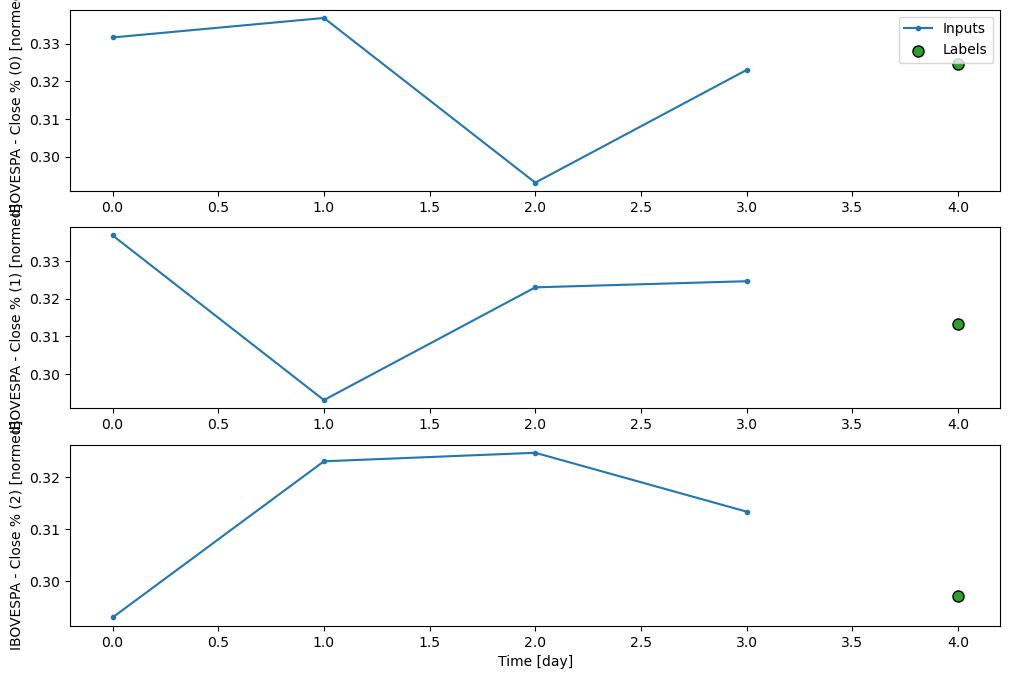

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
# Define the Required Callback Function
class printlearningrate(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        optimizer = self.model.optimizer
        lr = tf.keras.backend.eval(optimizer.learning_rate)
        # lr = tf.keras.backend.eval(optimizer.lr)
        Epoch_count = epoch + 1
        print(f"\nEpoch: {Epoch_count} - LR: {lr}")
        return lr

In [24]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

  # opitimizer AdamW
  # optimizer = tf.keras.optimizers.AdamW(learning_rate=LEARNING_RATE) # weight_decay=0.004
  # optimizer =  tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE, weight_decay=0.004)

  # optimizer =  tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE, weight_decay=1e-6)
  
  def scheduler(epoch, lr):
    decay = LEARNING_DECAY
    decayEveryEpochs = DECAY_EVERY_EPOCHS
    iterations = epoch // decayEveryEpochs
    optimizer = model.optimizer
    # return tf.keras.backend.eval(optimizer.learning_rate)
    # decay by 0.1 every 5 epochs; use `% 1` to decay after each epoch
    if (epoch % decayEveryEpochs == 0) and (epoch != 0):
        lr = lr * (1 - decay)
        lr = lr * (1. / (1. + decay * iterations))
    print(f"Epoch: {epoch} - Learning rate: {optimizer.learning_rate} - LR: {lr}")
    return lr
    return tf.keras.backend.eval(optimizer.learning_rate)
  
  printlr = printlearningrate() 
  updatelr = tf.keras.callbacks.LearningRateScheduler(scheduler)
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr,early_stopping]) # updatelr])
  return history

Definir modelo da rede e realizar o treinamento

In [25]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 4, 2), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [26]:
num_features = df_x_values.shape[1]

num_features

2

In [27]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [28]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [29]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [30]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [31]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9:08 2s/step - loss: 0.3745 - mean_absolute_error: 0.3745 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 0.1499 - root_mean_squared_error: 0.3872

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2477 - mean_absolute_error: 0.2477 - mean_absolute_percentage_error: 68.9830 - mean_squared_error: 0.0840 - root_mean_squared_error: 0.2837  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1888 - mean_absolute_error: 0.1888 - mean_absolute_percentage_error: 53.2355 - mean_squared_error: 0.0594 - root_mean_squared_error: 0.2339

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1537 - mean_absolute_error: 0.1537 - mean_absolute_percentage_error: 43.6860 - mean_squared_error: 0.0459 - root_mean_squared_error: 0.2020

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1353 - mean_absolute_error: 0.1353 - mean_absolute_percentage_error: 13204.6533 - mean_squared_error: 0.0387 - root_mean_squared_error: 0.1838

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1221 - mean_absolute_error: 0.1221 - mean_absolute_percentage_error: 55573.5312 - mean_squared_error: 0.0335 - root_mean_squared_error: 0.1700

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1131 - mean_absolute_error: 0.1131 - mean_absolute_percentage_error: 74809.4922 - mean_squared_error: 0.0301 - root_mean_squared_error: 0.1602

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1059 - mean_absolute_error: 0.1059 - mean_absolute_percentage_error: 85274.6016 - mean_squared_error: 0.0274 - root_mean_squared_error: 0.1521

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1000 - mean_absolute_error: 0.1000 - mean_absolute_percentage_error: 90916.3594 - mean_squared_error: 0.0252 - root_mean_squared_error: 0.1453

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0950 - mean_absolute_error: 0.0950 - mean_absolute_percentage_error: 93751.1797 - mean_squared_error: 0.0234 - root_mean_squared_error: 0.1395

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0907 - mean_absolute_error: 0.0907 - mean_absolute_percentage_error: 94886.7109 - mean_squared_error: 0.0218 - root_mean_squared_error: 0.1344

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0866 - mean_absolute_error: 0.0866 - mean_absolute_percentage_error: 94928.0859 - mean_squared_error: 0.0204 - root_mean_squared_error: 0.1294

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0834 - mean_absolute_error: 0.0834 - mean_absolute_percentage_error: 94283.4062 - mean_squared_error: 0.0192 - root_mean_squared_error: 0.1254

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0803 - mean_absolute_error: 0.0803 - mean_absolute_percentage_error: 93102.9766 - mean_squared_error: 0.0182 - root_mean_squared_error: 0.1216

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0779 - mean_absolute_error: 0.0779 - mean_absolute_percentage_error: 91783.2734 - mean_squared_error: 0.0173 - root_mean_squared_error: 0.1185

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0756 - mean_absolute_error: 0.0756 - mean_absolute_percentage_error: 90318.6719 - mean_squared_error: 0.0166 - root_mean_squared_error: 0.1156

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0736 - mean_absolute_error: 0.0736 - mean_absolute_percentage_error: 88772.1719 - mean_squared_error: 0.0159 - root_mean_squared_error: 0.1130

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0717 - mean_absolute_error: 0.0717 - mean_absolute_percentage_error: 87186.3125 - mean_squared_error: 0.0153 - root_mean_squared_error: 0.1106

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0700 - mean_absolute_error: 0.0700 - mean_absolute_percentage_error: 85590.0078 - mean_squared_error: 0.0147 - root_mean_squared_error: 0.1083

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0683 - mean_absolute_error: 0.0683 - mean_absolute_percentage_error: 83827.7266 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1060

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0671 - mean_absolute_error: 0.0671 - mean_absolute_percentage_error: 82610.6250 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1045

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0658 - mean_absolute_error: 0.0658 - mean_absolute_percentage_error: 81073.3516 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1027

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0643 - mean_absolute_error: 0.0643 - mean_absolute_percentage_error: 79408.1719 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1008

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 77952.0859 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.0992

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0620 - mean_absolute_error: 0.0620 - mean_absolute_percentage_error: 76538.4062 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.0977

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0610 - mean_absolute_error: 0.0610 - mean_absolute_percentage_error: 75167.9688 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.0962


Epoch: 1 - LR: 0.009752360172569752
238/238 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0600 - mean_absolute_error: 0.0600 - mean_absolute_percentage_error: 73842.3438 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.0949 - val_loss: 0.0128 - val_mean_absolute_error: 0.0128 - val_mean_absolute_percentage_error: 3.9258 - val_mean_squared_error: 2.6792e-04 - val_root_mean_squared_error: 0.0164


Epoch 2/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0840 - mean_absolute_error: 0.0840 - mean_absolute_percentage_error: 23.5211 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1109

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0739 - mean_absolute_error: 0.0739 - mean_absolute_percentage_error: 23.2852 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0948 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0669 - mean_absolute_error: 0.0669 - mean_absolute_percentage_error: 21.5705 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0876

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0613 - mean_absolute_error: 0.0613 - mean_absolute_percentage_error: 19.8322 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0817

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0574 - mean_absolute_error: 0.0574 - mean_absolute_percentage_error: 14665.9365 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0775

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 58494.9258 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0760

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 81424.5781 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0744

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 92837.4375 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0730

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 100063.1094 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0715

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 103780.3516 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0701

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 105476.9375 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0687

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 105671.2109 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0674

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 104985.1953 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 103716.1719 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0651

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 102099.5000 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0641

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 100470.5859 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0633

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 98555.9844 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625 

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 96789.4297 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0617

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 95014.0703 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0610

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 93250.8281 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 91513.8125 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 89812.3672 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 87970.8594 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0584

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 86185.6016 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 84629.0469 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 83120.7109 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0568


Epoch: 2 - LR: 0.009510851465165615
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 82143.5312 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565 - val_loss: 0.0126 - val_mean_absolute_error: 0.0126 - val_mean_absolute_percentage_error: 3.8864 - val_mean_squared_error: 2.6103e-04 - val_root_mean_squared_error: 0.0162


Epoch 3/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0847 - mean_absolute_error: 0.0847 - mean_absolute_percentage_error: 23.5477 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1113

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0743 - mean_absolute_error: 0.0743 - mean_absolute_percentage_error: 23.9077 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0952 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0671 - mean_absolute_error: 0.0671 - mean_absolute_percentage_error: 22.2606 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0881

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 20.2462 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0815

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0573 - mean_absolute_error: 0.0573 - mean_absolute_percentage_error: 13424.6777 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0779

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 56567.2969 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0762

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 76155.1641 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0746

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 86812.1875 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0730

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 92557.8047 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0716

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 95445.1953 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0702

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 96602.2266 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0689

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 96683.5703 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 95989.3359 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 94924.3828 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0654

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 93602.7188 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 92124.6406 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 90379.6328 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 88765.2500 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 86959.9141 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 85346.1406 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 83581.6172 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 82028.4062 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0593

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 80347.9922 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 78879.8359 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 77455.2344 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0575

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 76074.7578 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570


Epoch: 3 - LR: 0.009275324642658234
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 75180.4141 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0567 - val_loss: 0.0139 - val_mean_absolute_error: 0.0139 - val_mean_absolute_percentage_error: 4.2273 - val_mean_squared_error: 3.1216e-04 - val_root_mean_squared_error: 0.0177


Epoch 4/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0878 - mean_absolute_error: 0.0878 - mean_absolute_percentage_error: 24.0539 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1142

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0753 - mean_absolute_error: 0.0753 - mean_absolute_percentage_error: 23.3399 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0960 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0678 - mean_absolute_error: 0.0678 - mean_absolute_percentage_error: 21.7821 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0886

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0603 - mean_absolute_error: 0.0603 - mean_absolute_percentage_error: 19.5262 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0809

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 13940.7158 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0771

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 58746.4805 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0753

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 79089.4766 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0736

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 91021.2344 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 96576.8906 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0703

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 99329.8750 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0689

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 100380.1172 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 100440.7109 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0666

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 99883.4531 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0654 

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 98855.7812 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 97531.9062 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 95850.9922 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0627

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 94230.7969 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0619

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 92373.2656 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0611

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 90685.6484 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 89005.7812 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 87348.2969 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 85544.6719 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0584

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 83789.1797 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0577

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 82254.5625 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 80764.9219 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0567

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 79321.0547 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562


Epoch: 4 - LR: 0.009045630693435669
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 78077.6172 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0558 - val_loss: 0.0128 - val_mean_absolute_error: 0.0128 - val_mean_absolute_percentage_error: 3.9345 - val_mean_squared_error: 2.6769e-04 - val_root_mean_squared_error: 0.0164


Epoch 5/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0863 - mean_absolute_error: 0.0863 - mean_absolute_percentage_error: 23.8085 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1126

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0746 - mean_absolute_error: 0.0746 - mean_absolute_percentage_error: 23.0626 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0954 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0663 - mean_absolute_error: 0.0663 - mean_absolute_percentage_error: 21.1749 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0871

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0591 - mean_absolute_error: 0.0591 - mean_absolute_percentage_error: 19.1008 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0798

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0555 - mean_absolute_error: 0.0555 - mean_absolute_percentage_error: 25879.9844 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0762

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 58928.0977 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0748

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 80923.8359 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0730

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 91302.8750 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0714

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 96875.7656 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0699

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 99637.2969 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 100690.8047 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0673

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 100631.9531 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0659

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 99891.2500 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0648 

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 98887.5859 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 97510.7500 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 95970.9766 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 94338.0859 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 92471.3438 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 90778.4453 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0601

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 88909.4922 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0593

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 87253.3438 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 85453.2422 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 83875.3438 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0575

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 82340.9219 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 81178.7188 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 79725.2656 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560


Epoch: 5 - LR: 0.008821624331176281
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 78319.3203 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556 - val_loss: 0.0127 - val_mean_absolute_error: 0.0127 - val_mean_absolute_percentage_error: 3.9084 - val_mean_squared_error: 2.6351e-04 - val_root_mean_squared_error: 0.0162


Epoch 6/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0863 - mean_absolute_error: 0.0863 - mean_absolute_percentage_error: 23.8163 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1126

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0745 - mean_absolute_error: 0.0745 - mean_absolute_percentage_error: 23.1371 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0952 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0663 - mean_absolute_error: 0.0663 - mean_absolute_percentage_error: 21.3068 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0871

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0592 - mean_absolute_error: 0.0592 - mean_absolute_percentage_error: 19.2343 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0798

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0557 - mean_absolute_error: 0.0557 - mean_absolute_percentage_error: 26143.1230 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0763

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 62498.3203 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0747

 59/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 83248.3828 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0729

 68/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 93048.4922 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0713

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 98285.0859 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0699

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 100839.0391 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 101788.2500 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0671

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 101598.7266 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0659

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 100678.7422 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 99453.4297 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638 

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 97826.4688 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 96222.1016 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 94547.1406 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 92841.6406 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 91132.8516 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 89439.2266 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0592

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 87773.2109 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 85964.3047 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 84379.8906 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 82671.6250 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0568

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 81182.7422 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 79740.3281 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0558


Epoch: 6 - LR: 0.008603165857493877
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 79115.6953 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556 - val_loss: 0.0125 - val_mean_absolute_error: 0.0125 - val_mean_absolute_percentage_error: 3.8532 - val_mean_squared_error: 2.5513e-04 - val_root_mean_squared_error: 0.0160


Epoch 7/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0858 - mean_absolute_error: 0.0858 - mean_absolute_percentage_error: 23.7445 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1121

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0737 - mean_absolute_error: 0.0737 - mean_absolute_percentage_error: 23.0749 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0945 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0661 - mean_absolute_error: 0.0661 - mean_absolute_percentage_error: 21.2432 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0869

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0595 - mean_absolute_error: 0.0595 - mean_absolute_percentage_error: 19.2517 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0801

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 14236.1289 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0765

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 59993.4102 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0747

 58/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 82386.8672 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0729

 68/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 93777.1719 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 99054.7812 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0697

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 101227.6328 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0687

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 102454.8281 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0674

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 102541.1484 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 101907.2500 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0650

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 100816.7578 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 99273.7031 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631 

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 97706.0859 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 96043.6719 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 94143.1797 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 92228.4688 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 90516.9219 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0593

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 88830.8281 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 87179.2734 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 85391.7500 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 83829.5859 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 82147.9141 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 80524.0078 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0558


Epoch: 7 - LR: 0.00839011650532484
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 79735.2734 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555 - val_loss: 0.0126 - val_mean_absolute_error: 0.0126 - val_mean_absolute_percentage_error: 3.8742 - val_mean_squared_error: 2.5820e-04 - val_root_mean_squared_error: 0.0161


Epoch 8/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0862 - mean_absolute_error: 0.0862 - mean_absolute_percentage_error: 23.8280 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1125

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0745 - mean_absolute_error: 0.0745 - mean_absolute_percentage_error: 23.0845 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0953 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0662 - mean_absolute_error: 0.0662 - mean_absolute_percentage_error: 21.1974 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0870

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0591 - mean_absolute_error: 0.0591 - mean_absolute_percentage_error: 19.1214 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0797

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0557 - mean_absolute_error: 0.0557 - mean_absolute_percentage_error: 20597.6094 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0763

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 63194.0430 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0746

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 82656.8203 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0729

 68/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 94084.4609 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0711

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 99379.3672 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0697

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 101961.7734 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 102890.6250 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 102729.9297 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0657

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 101917.4922 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 100560.7500 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 99089.1562 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628 

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 97293.4453 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0619

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 95599.8281 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 93683.1172 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 91956.2109 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 90057.9297 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 88380.8047 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0583

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 86741.2734 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0577

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 85495.1953 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 83932.9844 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0568

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 82417.1172 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 80948.1953 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0558


Epoch: 8 - LR: 0.008182344026863575
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 79996.5625 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555 - val_loss: 0.0125 - val_mean_absolute_error: 0.0125 - val_mean_absolute_percentage_error: 3.8551 - val_mean_squared_error: 2.5523e-04 - val_root_mean_squared_error: 0.0160


Epoch 9/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0860 - mean_absolute_error: 0.0860 - mean_absolute_percentage_error: 23.7995 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1123

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0744 - mean_absolute_error: 0.0744 - mean_absolute_percentage_error: 23.0813 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0951 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0661 - mean_absolute_error: 0.0661 - mean_absolute_percentage_error: 21.1984 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0870

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0595 - mean_absolute_error: 0.0595 - mean_absolute_percentage_error: 19.2032 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0802

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 14364.9863 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0765

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 57294.7031 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0749

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 81500.5469 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0730

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 92905.9609 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0714

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 99521.3047 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0698

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 102550.0391 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 103515.3750 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 103257.5859 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 102387.0469 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 101140.9453 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 99660.8672 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0627 

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 98040.5312 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 96342.8203 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 94610.2734 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 92871.7891 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 90956.8281 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 89262.5312 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0584

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 87604.6406 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 85988.4766 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 84417.2500 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0567

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 82892.6328 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 81254.0000 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0557


Epoch: 9 - LR: 0.007979716174304485
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 80458.1172 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554 - val_loss: 0.0125 - val_mean_absolute_error: 0.0125 - val_mean_absolute_percentage_error: 3.8468 - val_mean_squared_error: 2.5385e-04 - val_root_mean_squared_error: 0.0159


Epoch 10/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0859 - mean_absolute_error: 0.0859 - mean_absolute_percentage_error: 23.7825 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1122

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0738 - mean_absolute_error: 0.0738 - mean_absolute_percentage_error: 23.0719 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0945 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0661 - mean_absolute_error: 0.0661 - mean_absolute_percentage_error: 21.2192 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0869

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0595 - mean_absolute_error: 0.0595 - mean_absolute_percentage_error: 19.2237 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0801

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0557 - mean_absolute_error: 0.0557 - mean_absolute_percentage_error: 20784.8867 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0763

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 63768.9102 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0745

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 83408.7812 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0728

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 91233.5000 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 98334.3281 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0703

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 101987.3516 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0689

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 103568.7656 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 103868.6484 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 103269.4062 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0650

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 102206.9141 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0640

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 100672.7500 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 99100.2656 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623 

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 97235.0781 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 95504.6484 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 93759.8203 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0600

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 92023.0000 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0593

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 90120.8359 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 88444.5625 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 86629.5547 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 85042.9219 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0568

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 83334.5703 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 81847.0156 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0558


Epoch: 10 - LR: 0.0077821058221161366
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 80724.3672 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554 - val_loss: 0.0126 - val_mean_absolute_error: 0.0126 - val_mean_absolute_percentage_error: 3.8839 - val_mean_squared_error: 2.5954e-04 - val_root_mean_squared_error: 0.0161


Epoch 11/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0865 - mean_absolute_error: 0.0865 - mean_absolute_percentage_error: 23.8881 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1127

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0740 - mean_absolute_error: 0.0740 - mean_absolute_percentage_error: 23.1120 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0948 

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0655 - mean_absolute_error: 0.0655 - mean_absolute_percentage_error: 21.0148 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0863

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0587 - mean_absolute_error: 0.0587 - mean_absolute_percentage_error: 19.1011 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0793

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 26656.1797 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0763

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 66549.9844 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0745

 59/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 84883.0703 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0728

 68/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 94875.6797 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 100215.1250 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0697

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 102819.2578 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0684

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 103787.1172 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 103593.8750 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0657

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 102655.8281 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 101406.4531 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 99922.4922 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628 

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 98297.9062 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 97168.7812 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 96787.2344 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 96403.8203 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 95826.0234 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0610

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 94858.6328 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 93502.3203 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0600

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 91960.2578 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0594

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 91005.2734 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 90436.5469 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 89496.8594 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0585

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 88568.4844 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 87470.7656 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 86214.2031 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 84811.6016 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0568

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 83953.6406 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0566

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 82943.3047 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 82117.4531 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 81145.7266 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0556


Epoch: 11 - LR: 0.007589389570057392
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 80669.3281 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555 - val_loss: 0.0124 - val_mean_absolute_error: 0.0124 - val_mean_absolute_percentage_error: 3.8389 - val_mean_squared_error: 2.5243e-04 - val_root_mean_squared_error: 0.0159


Epoch 12/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 0.0857 - mean_absolute_error: 0.0857 - mean_absolute_percentage_error: 23.7553 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1120

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0751 - mean_absolute_error: 0.0751 - mean_absolute_percentage_error: 22.8700 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0955  

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0695 - mean_absolute_error: 0.0695 - mean_absolute_percentage_error: 22.1718 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0903

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0644 - mean_absolute_error: 0.0644 - mean_absolute_percentage_error: 20.7286 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0852

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0595 - mean_absolute_error: 0.0595 - mean_absolute_percentage_error: 19.2176 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0801

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0585 - mean_absolute_error: 0.0585 - mean_absolute_percentage_error: 19.0614 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0791

 33/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0576 - mean_absolute_error: 0.0576 - mean_absolute_percentage_error: 18.8981 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0782

 35/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0568 - mean_absolute_error: 0.0568 - mean_absolute_percentage_error: 18.7448 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0773

 37/238 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 7485.6855 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0766

 39/238 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 20721.2227 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0762

 41/238 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 32025.5723 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0759

 43/238 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 41725.6406 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0756

 45/238 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 50082.8164 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0752

 46/238 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 53825.4102 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0750

 49/238 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 63573.4961 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0744

 52/238 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 71473.4609 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0739

 54/238 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 75904.2578 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0735

 62/238 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 88694.1094 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 69/238 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 95425.0312 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0709

 75/238 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 99078.3047 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0699

 81/238 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 101390.8047 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0689

 86/238 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 102574.0781 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0682

 92/238 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 103336.9531 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0673

100/238 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 103550.3203 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0662

107/238 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 103209.5234 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

114/238 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 102529.5469 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

121/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 101611.9297 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

129/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 100364.2266 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

136/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 99155.9609 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624 

142/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 98063.5234 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0619

146/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 97315.4531 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

153/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 95982.1250 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0610

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 94632.4609 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 93665.7109 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0601

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 92508.4609 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 91168.3750 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 89657.1562 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0585

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 88357.3047 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 86901.3438 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0575

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 85655.4375 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 84437.0469 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0567

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 83415.1641 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 82085.2734 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0559

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 80792.7188 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555


Epoch: 12 - LR: 0.007401445880532265
238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 80476.9844 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554 - val_loss: 0.0126 - val_mean_absolute_error: 0.0126 - val_mean_absolute_percentage_error: 3.8739 - val_mean_squared_error: 2.5811e-04 - val_root_mean_squared_error: 0.0161


Epoch 13/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0864 - mean_absolute_error: 0.0864 - mean_absolute_percentage_error: 23.8674 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1126

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0750 - mean_absolute_error: 0.0750 - mean_absolute_percentage_error: 23.0782 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0956 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0698 - mean_absolute_error: 0.0698 - mean_absolute_percentage_error: 22.2525 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0906

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0655 - mean_absolute_error: 0.0655 - mean_absolute_percentage_error: 21.0552 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0863

 25/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0623 - mean_absolute_error: 0.0623 - mean_absolute_percentage_error: 20.1062 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0830

 33/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 18.9813 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0784

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 20845.6445 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0764

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 41976.2109 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0758

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 57652.2969 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0750

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 78371.6094 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0735 

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 92526.6797 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0717

 74/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 99167.1328 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0702

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 102782.8047 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0687

 92/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 103957.5312 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

100/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 104172.1797 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0664

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 103663.5703 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 102505.5859 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0641

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 101132.8359 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0633

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 99389.8516 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624 

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 97709.8359 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 95977.7656 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0609

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 94228.1719 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0601

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 92484.5234 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 90573.2188 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 88887.8828 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 87242.4688 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0576

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 85992.9688 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 84599.0781 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0567

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 83409.9531 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 82086.1719 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0558


Epoch: 13 - LR: 0.007218156475573778
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 80960.2344 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555 - val_loss: 0.0125 - val_mean_absolute_error: 0.0125 - val_mean_absolute_percentage_error: 3.8540 - val_mean_squared_error: 2.5498e-04 - val_root_mean_squared_error: 0.0160


Epoch 14/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0861 - mean_absolute_error: 0.0861 - mean_absolute_percentage_error: 23.8138 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1123

  7/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0765 - mean_absolute_error: 0.0765 - mean_absolute_percentage_error: 23.0520 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0973 

 11/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0738 - mean_absolute_error: 0.0738 - mean_absolute_percentage_error: 23.0694 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0946

 17/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0687 - mean_absolute_error: 0.0687 - mean_absolute_percentage_error: 21.9411 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0896

 25/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0622 - mean_absolute_error: 0.0622 - mean_absolute_percentage_error: 20.0222 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0829 

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0581 - mean_absolute_error: 0.0581 - mean_absolute_percentage_error: 18.9798 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0787

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 14404.3604 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0765

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 41830.2773 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0756

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 63732.9531 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0745

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 79972.6875 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0732

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 90087.4766 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 96389.4219 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0707

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 100226.9609 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0696

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 102425.5391 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

 91/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 103510.3750 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

 99/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 103823.3906 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0664

105/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 103606.1172 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0656

109/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 103303.2578 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0651

114/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 102786.7578 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 101720.4844 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 100616.0000 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 99582.7812 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0625 

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 98679.1328 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 97180.2656 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 95450.8203 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 93706.9766 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 91779.4688 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0592

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 90070.0391 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 88210.9688 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 86580.7266 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 84821.6406 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0567

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 83287.6016 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 81800.8906 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0558


Epoch: 14 - LR: 0.007039405405521393
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 80678.8672 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554 - val_loss: 0.0125 - val_mean_absolute_error: 0.0125 - val_mean_absolute_percentage_error: 3.8512 - val_mean_squared_error: 2.5451e-04 - val_root_mean_squared_error: 0.0160


Epoch 15/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0860 - mean_absolute_error: 0.0860 - mean_absolute_percentage_error: 23.8049 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1123

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0752 - mean_absolute_error: 0.0752 - mean_absolute_percentage_error: 22.8908 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0956 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0696 - mean_absolute_error: 0.0696 - mean_absolute_percentage_error: 22.1960 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0904

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0661 - mean_absolute_error: 0.0661 - mean_absolute_percentage_error: 21.2368 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0870

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0601 - mean_absolute_error: 0.0601 - mean_absolute_percentage_error: 19.4185 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0808

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0562 - mean_absolute_error: 0.0562 - mean_absolute_percentage_error: 7497.9834 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0767

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 46133.5781 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0755

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 69133.4609 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0741

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 86250.6875 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0725

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 96306.2891 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0707

 79/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 100907.9688 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0693

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 103067.5703 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0680

 97/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 103729.0469 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0667

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 103451.5859 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 102579.4141 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 101330.9688 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0635

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 99848.1016 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0627 

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 98038.6406 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0618

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 96332.0547 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0611

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 94594.3594 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 92853.3047 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 90937.5312 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 89057.7422 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 87405.6484 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0577

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 85620.1875 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 83891.1484 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 82220.2031 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0559

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 80766.7344 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555


Epoch: 15 - LR: 0.0068650818429887295
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 80609.2734 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554 - val_loss: 0.0125 - val_mean_absolute_error: 0.0125 - val_mean_absolute_percentage_error: 3.8487 - val_mean_squared_error: 2.5412e-04 - val_root_mean_squared_error: 0.0159


Epoch 16/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0860 - mean_absolute_error: 0.0860 - mean_absolute_percentage_error: 23.7974 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1122

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0744 - mean_absolute_error: 0.0744 - mean_absolute_percentage_error: 23.1021 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0951 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0661 - mean_absolute_error: 0.0661 - mean_absolute_percentage_error: 21.2306 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0869

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0595 - mean_absolute_error: 0.0595 - mean_absolute_percentage_error: 19.2347 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0801

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0557 - mean_absolute_error: 0.0557 - mean_absolute_percentage_error: 20825.4355 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0763

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 60856.0312 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0747

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 83571.5859 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0728

 68/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 95125.7266 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0711

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 100479.2578 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0696

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 103090.2500 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0682

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 104060.6641 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 103866.9141 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0656

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 103045.4844 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 101673.7266 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0635

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 100185.8438 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0627

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 98370.2578 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0618 

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 96465.1016 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0610

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 94525.6250 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0602

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 92780.7422 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 91054.6641 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 89358.9766 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 87701.2969 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0576

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 86086.4375 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 84517.2500 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0566

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 82995.1250 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 81359.5859 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555


Epoch: 16 - LR: 0.006695074494928122
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 80881.9297 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554 - val_loss: 0.0124 - val_mean_absolute_error: 0.0124 - val_mean_absolute_percentage_error: 3.8350 - val_mean_squared_error: 2.5170e-04 - val_root_mean_squared_error: 0.0159


Epoch 17/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0856 - mean_absolute_error: 0.0856 - mean_absolute_percentage_error: 23.7361 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1119

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0736 - mean_absolute_error: 0.0736 - mean_absolute_percentage_error: 23.0439 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0944 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0660 - mean_absolute_error: 0.0660 - mean_absolute_percentage_error: 21.1940 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0868

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0589 - mean_absolute_error: 0.0589 - mean_absolute_percentage_error: 19.1222 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0795

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 20872.5234 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0762

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 60993.7734 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0746

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 83760.7734 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0727

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 94503.7500 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0711

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 100272.0547 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0697

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 102915.8438 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 104163.5156 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0672

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 104307.0234 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0662

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 103797.7656 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0650

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 102774.6875 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0640

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 101427.5859 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 99880.5469 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624 

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 98026.5859 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 96296.1172 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 94350.1641 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 92604.2656 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0593

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 90690.4844 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 89002.9688 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 87355.4219 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 85927.8359 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 84365.4922 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 82685.1016 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0559


Epoch: 17 - LR: 0.006529277190566063


238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 81065.0625 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554 - val_loss: 0.0124 - val_mean_absolute_error: 0.0124 - val_mean_absolute_percentage_error: 3.8423 - val_mean_squared_error: 2.5065e-04 - val_root_mean_squared_error: 0.0158


Epoch 18/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0853 - mean_absolute_error: 0.0853 - mean_absolute_percentage_error: 23.6928 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1116

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0740 - mean_absolute_error: 0.0740 - mean_absolute_percentage_error: 23.1116 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0947 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0668 - mean_absolute_error: 0.0668 - mean_absolute_percentage_error: 21.5355 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0876

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0600 - mean_absolute_error: 0.0600 - mean_absolute_percentage_error: 19.4884 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0806

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 7538.7202 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0766

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 57714.4102 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0748

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 82097.5781 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0730

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 93586.5469 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0714

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 100250.3516 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0697

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 103108.0938 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 104242.3203 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 104137.4062 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0657

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 103370.8984 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 102185.2578 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 100564.9453 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 98944.8516 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620 

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 97048.5469 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0611

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 95303.3047 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 93358.0625 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 91623.0859 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 89728.8906 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 88063.3047 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0577

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 86440.2031 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 85035.6016 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0566

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 83837.0000 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 82338.2031 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0558


Epoch: 18 - LR: 0.006367586553096771
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 81047.4609 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553 - val_loss: 0.0124 - val_mean_absolute_error: 0.0124 - val_mean_absolute_percentage_error: 3.8377 - val_mean_squared_error: 2.5121e-04 - val_root_mean_squared_error: 0.0158


Epoch 19/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0855 - mean_absolute_error: 0.0855 - mean_absolute_percentage_error: 23.7180 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1118

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0741 - mean_absolute_error: 0.0741 - mean_absolute_percentage_error: 23.0925 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0948 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0668 - mean_absolute_error: 0.0668 - mean_absolute_percentage_error: 21.4889 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0876

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0600 - mean_absolute_error: 0.0600 - mean_absolute_percentage_error: 19.4405 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0806

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 7541.1758 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0766

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 57733.5508 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0748

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 80364.7891 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0731

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 91629.1172 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0717

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 98760.7422 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0702

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 102690.5625 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0687

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 104175.5391 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0672

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 104221.8750 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0658

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 103514.6875 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0647

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 102219.1953 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 100598.3516 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 98977.7188 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620 

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 97080.7812 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0611

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 95140.1797 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 93195.1875 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 91462.2422 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 89571.6094 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 87909.9844 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0576

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 86291.2812 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 84718.3516 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 83026.0234 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 81553.1719 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555


Epoch: 19 - LR: 0.0062098996713757515
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 81074.3828 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554 - val_loss: 0.0124 - val_mean_absolute_error: 0.0124 - val_mean_absolute_percentage_error: 3.8350 - val_mean_squared_error: 2.5174e-04 - val_root_mean_squared_error: 0.0159


Epoch 20/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0856 - mean_absolute_error: 0.0856 - mean_absolute_percentage_error: 23.7362 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1119

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0742 - mean_absolute_error: 0.0742 - mean_absolute_percentage_error: 23.1006 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0949 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0669 - mean_absolute_error: 0.0669 - mean_absolute_percentage_error: 21.4961 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0877

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0601 - mean_absolute_error: 0.0601 - mean_absolute_percentage_error: 19.4469 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0807

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 14508.5215 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0764

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 57867.5586 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0748

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 82315.4688 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0730

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 93834.9375 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0714

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 99537.4844 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0701

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 102667.3906 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0688

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 104259.3516 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 104561.2266 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0662

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 104050.7266 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0651

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 103025.1484 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0641

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 101674.7656 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 100123.9609 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 98455.5000 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616 

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 96530.7812 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 94775.2734 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0601

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 92829.9297 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0593

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 91101.6641 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 89405.9375 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 87749.6797 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0575

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 85960.8906 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 84399.9766 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 82721.3828 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0558


Epoch: 20 - LR: 0.006056117359548807


238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 81262.5938 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554 - val_loss: 0.0124 - val_mean_absolute_error: 0.0124 - val_mean_absolute_percentage_error: 3.8349 - val_mean_squared_error: 2.5171e-04 - val_root_mean_squared_error: 0.0159


Epoch 21/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0856 - mean_absolute_error: 0.0856 - mean_absolute_percentage_error: 23.7350 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1119

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0742 - mean_absolute_error: 0.0742 - mean_absolute_percentage_error: 23.0694 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0949 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0660 - mean_absolute_error: 0.0660 - mean_absolute_percentage_error: 21.2061 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0868

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0594 - mean_absolute_error: 0.0594 - mean_absolute_percentage_error: 19.2155 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0800

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0558 - mean_absolute_error: 0.0558 - mean_absolute_percentage_error: 14532.9287 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0763

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 57965.1797 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0748

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 82454.3672 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0729

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 93993.2969 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0713

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 100686.0859 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0697

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 103556.2578 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 104651.2188 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 104640.1406 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0658

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 103820.2266 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 102629.4297 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 101175.0625 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 99560.8984 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620 

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 97663.6328 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 95913.0703 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 94153.7812 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 92406.5078 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 90685.2109 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0584

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 88999.1797 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 87716.1016 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 86105.9844 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0568

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 84542.4375 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 82861.0078 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0558


Epoch: 21 - LR: 0.005906143691390753
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 81399.7656 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553 - val_loss: 0.0124 - val_mean_absolute_error: 0.0124 - val_mean_absolute_percentage_error: 3.8403 - val_mean_squared_error: 2.5265e-04 - val_root_mean_squared_error: 0.0159


Epoch 22/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0858 - mean_absolute_error: 0.0858 - mean_absolute_percentage_error: 23.7632 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1120

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0742 - mean_absolute_error: 0.0742 - mean_absolute_percentage_error: 23.0876 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0949 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0669 - mean_absolute_error: 0.0669 - mean_absolute_percentage_error: 21.4638 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0877

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0595 - mean_absolute_error: 0.0595 - mean_absolute_percentage_error: 19.2352 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0801

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0557 - mean_absolute_error: 0.0557 - mean_absolute_percentage_error: 20948.5098 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0762

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 61215.8945 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0746

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 82414.3828 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0730

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 93947.7031 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0714

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 100637.2344 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0697

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 103506.0156 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 104644.6250 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 104539.3047 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0657

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 103654.9062 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 102428.8438 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 100953.0703 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0627

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 99326.7188 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0619 

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 97423.0938 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0611

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 95671.1172 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 93718.3672 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 91976.6953 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 90075.1875 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 88403.1719 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0576

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 86773.8047 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 85190.1328 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0565

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 83485.9453 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 82002.6094 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555


Epoch: 22 - LR: 0.00575988320633769
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 81360.2500 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553 - val_loss: 0.0124 - val_mean_absolute_error: 0.0124 - val_mean_absolute_percentage_error: 3.8449 - val_mean_squared_error: 2.5042e-04 - val_root_mean_squared_error: 0.0158


Epoch 23/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0852 - mean_absolute_error: 0.0852 - mean_absolute_percentage_error: 23.6770 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1115

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0740 - mean_absolute_error: 0.0740 - mean_absolute_percentage_error: 23.0852 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0947 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0659 - mean_absolute_error: 0.0659 - mean_absolute_percentage_error: 21.2639 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0867

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0589 - mean_absolute_error: 0.0589 - mean_absolute_percentage_error: 19.1986 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0795

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 21014.1133 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0761

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 61407.6328 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0746

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 80900.7422 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0731

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 92240.2109 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0716

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 99419.4141 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0702

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 103112.7422 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0687

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 104711.6172 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0674

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 104991.4453 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 104408.9531 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0649

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 103193.6484 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 101783.6406 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 100193.7969 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 98500.1953 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614 

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 96558.5000 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 94794.4141 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 93232.6094 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0593

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 92072.2422 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 90925.1094 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0584

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 89793.7578 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 88130.3203 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0574

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 86510.8672 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 84937.9219 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 83246.1328 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0558


Epoch: 23 - LR: 0.005617246031761169


238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 81615.0938 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553 - val_loss: 0.0124 - val_mean_absolute_error: 0.0124 - val_mean_absolute_percentage_error: 3.8383 - val_mean_squared_error: 2.5111e-04 - val_root_mean_squared_error: 0.0158


Epoch 24/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0855 - mean_absolute_error: 0.0855 - mean_absolute_percentage_error: 23.7134 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1118

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0741 - mean_absolute_error: 0.0741 - mean_absolute_percentage_error: 23.0710 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0948 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0668 - mean_absolute_error: 0.0668 - mean_absolute_percentage_error: 21.4533 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0876

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0600 - mean_absolute_error: 0.0600 - mean_absolute_percentage_error: 19.4055 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0806

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0564 - mean_absolute_error: 0.0564 - mean_absolute_percentage_error: 18.6955 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0768

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 42293.3789 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0755

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 69959.2812 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0740

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 85833.1328 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0725

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 96723.7578 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0708

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 101740.9062 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0693

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 104298.8672 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0678

 97/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 104968.2422 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0666

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 104687.4688 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0654

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 103804.8750 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0643

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 102541.5156 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0634

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 101040.9297 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0626

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 99398.1562 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0618 

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 97676.9375 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0611

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 96312.1094 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 94548.8906 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 92795.7812 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 91067.4141 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0585

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 89373.5312 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 87539.4609 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 85936.1562 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0567

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 84379.8359 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 82871.3359 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0557


Epoch: 24 - LR: 0.005478139966726303
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 81572.2344 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553 - val_loss: 0.0124 - val_mean_absolute_error: 0.0124 - val_mean_absolute_percentage_error: 3.8409 - val_mean_squared_error: 2.5076e-04 - val_root_mean_squared_error: 0.0158


Epoch 25/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0854 - mean_absolute_error: 0.0854 - mean_absolute_percentage_error: 23.6995 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1117

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0740 - mean_absolute_error: 0.0740 - mean_absolute_percentage_error: 23.0831 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0947 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0668 - mean_absolute_error: 0.0668 - mean_absolute_percentage_error: 21.4873 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0876

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0600 - mean_absolute_error: 0.0600 - mean_absolute_percentage_error: 19.4426 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0806

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 7579.0913 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0766

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 58024.4883 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0748

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 82538.7266 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0729

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 94089.4531 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0713

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 100789.0859 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0697

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 103662.1953 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 104758.2734 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 104697.0469 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0656

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 103926.4297 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 102583.4062 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0635

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 101105.3984 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0627

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 99289.4453 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0618 

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 97570.1016 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0611

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 95619.7109 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0602

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 93859.7812 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 92115.4844 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 90399.6094 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 88720.5938 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0577

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 87083.8359 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 85492.5938 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0566

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 83779.9453 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 82289.0469 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555


Epoch: 25 - LR: 0.005342479329556227
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 81483.0156 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553 - val_loss: 0.0124 - val_mean_absolute_error: 0.0124 - val_mean_absolute_percentage_error: 3.8358 - val_mean_squared_error: 2.5190e-04 - val_root_mean_squared_error: 0.0159


Epoch 26/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0856 - mean_absolute_error: 0.0856 - mean_absolute_percentage_error: 23.7407 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1119

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0746 - mean_absolute_error: 0.0746 - mean_absolute_percentage_error: 23.0039 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0952 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0694 - mean_absolute_error: 0.0694 - mean_absolute_percentage_error: 22.1682 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0903

 25/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0620 - mean_absolute_error: 0.0620 - mean_absolute_percentage_error: 20.0297 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0828

 34/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 18.8287 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0777

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 42438.3516 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0755

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 75024.5625 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0737

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 91397.3516 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 72/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 99114.3906 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0703

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 103123.1094 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0689

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 104912.6719 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 105333.0312 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 104805.3281 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0650

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 103772.3203 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 102412.1406 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 100850.0859 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 98978.1250 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615 

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 97230.8516 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 95462.6172 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0600

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 93698.1797 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0594

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 91762.3594 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 89866.9062 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 88203.3594 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 86584.3047 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0568

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 85012.0625 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 83321.2969 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0558


Epoch: 26 - LR: 0.005210177972912788


238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 81851.9375 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553 - val_loss: 0.0124 - val_mean_absolute_error: 0.0124 - val_mean_absolute_percentage_error: 3.8642 - val_mean_squared_error: 2.5038e-04 - val_root_mean_squared_error: 0.0158


Epoch 27/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0847 - mean_absolute_error: 0.0847 - mean_absolute_percentage_error: 23.6011 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1110

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0737 - mean_absolute_error: 0.0737 - mean_absolute_percentage_error: 23.0723 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0944 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0658 - mean_absolute_error: 0.0658 - mean_absolute_percentage_error: 21.2747 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0865

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0588 - mean_absolute_error: 0.0588 - mean_absolute_percentage_error: 19.2143 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0793

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0558 - mean_absolute_error: 0.0558 - mean_absolute_percentage_error: 14600.5488 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0762

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 58234.9102 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0747

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 82838.0625 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0728

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 94430.6797 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 100680.7344 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0698

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 103821.6562 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0684

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 105138.1875 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 105241.6172 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0664

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 105127.0547 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0657

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 104413.7188 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 103400.2734 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 102155.0234 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 100577.7031 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 98889.3516 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614 

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 96947.8438 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 94984.2266 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 93224.7188 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 91297.7109 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0585

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 89599.5391 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 87760.8281 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 86153.4688 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0567

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 84422.8047 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 82915.8281 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556


Epoch: 27 - LR: 0.005081153009086847
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 81778.5156 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553 - val_loss: 0.0125 - val_mean_absolute_error: 0.0125 - val_mean_absolute_percentage_error: 3.8448 - val_mean_squared_error: 2.5350e-04 - val_root_mean_squared_error: 0.0159


Epoch 28/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0859 - mean_absolute_error: 0.0859 - mean_absolute_percentage_error: 23.7814 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1122

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0743 - mean_absolute_error: 0.0743 - mean_absolute_percentage_error: 23.0553 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0950 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0669 - mean_absolute_error: 0.0669 - mean_absolute_percentage_error: 21.4044 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0877

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0594 - mean_absolute_error: 0.0594 - mean_absolute_percentage_error: 19.1776 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0801

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 21017.2402 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0762

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 64482.3398 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0744

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 84342.0156 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0727

 68/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 96002.7031 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0710

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 101405.6016 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0695

 87/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 104214.8359 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0680

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 105020.0469 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0667

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 104758.5156 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0654

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 103875.3203 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0643

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 102453.9062 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0633

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 100932.4922 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0625

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 99087.8672 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616 

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 97354.4609 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0609

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 95397.1016 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0601

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 93636.1328 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0594

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 91702.3047 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 89994.9297 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 88326.5703 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0575

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 86701.8359 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 84950.9453 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 83425.4375 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0558

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 81947.8594 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554


Epoch: 28 - LR: 0.004955323413014412
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 81627.6094 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553 - val_loss: 0.0126 - val_mean_absolute_error: 0.0126 - val_mean_absolute_percentage_error: 3.8649 - val_mean_squared_error: 2.5670e-04 - val_root_mean_squared_error: 0.0160


Epoch 29/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0862 - mean_absolute_error: 0.0862 - mean_absolute_percentage_error: 23.8401 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1125

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0745 - mean_absolute_error: 0.0745 - mean_absolute_percentage_error: 23.0552 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0952 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0661 - mean_absolute_error: 0.0661 - mean_absolute_percentage_error: 21.1444 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0870

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0595 - mean_absolute_error: 0.0595 - mean_absolute_percentage_error: 19.1516 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0802

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 20849.8906 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0763

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 63968.6328 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0745

 59/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 85207.0625 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0726

 68/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 95237.8281 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0710

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 100998.7969 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0694

 87/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 103384.5156 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0680

 97/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 104202.5938 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0666

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 103923.8594 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0654

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 103047.7109 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0643

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 101793.5625 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0635

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 100303.9297 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0626

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 98486.2031 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0618 

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 96771.8203 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0610

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 94831.6094 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0602

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 93083.5312 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 91352.6641 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 89651.1562 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 87987.0156 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0576

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 86365.3203 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 84616.8594 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 83092.9453 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 81455.4766 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555


Epoch: 29 - LR: 0.004832609556615353
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 80977.2578 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553 - val_loss: 0.0126 - val_mean_absolute_error: 0.0126 - val_mean_absolute_percentage_error: 3.8651 - val_mean_squared_error: 2.5672e-04 - val_root_mean_squared_error: 0.0160


Epoch 30/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0862 - mean_absolute_error: 0.0862 - mean_absolute_percentage_error: 23.8408 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1125

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0745 - mean_absolute_error: 0.0745 - mean_absolute_percentage_error: 23.0166 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0953 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0669 - mean_absolute_error: 0.0669 - mean_absolute_percentage_error: 21.3131 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0879

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0595 - mean_absolute_error: 0.0595 - mean_absolute_percentage_error: 19.0851 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0802

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0564 - mean_absolute_error: 0.0564 - mean_absolute_percentage_error: 18.5537 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0770

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 50888.1758 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0753

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 77125.0625 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0735

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 91307.4453 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 98379.4453 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 101989.3359 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0694

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 104029.1094 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 104999.1562 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0673

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 105215.9609 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0662

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 104702.2656 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0650

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 103670.2734 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0640

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 102311.4297 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 100569.0000 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 98688.8906 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614 

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 96743.4766 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 95172.3359 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 93216.6641 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0592

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 91480.7656 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0585

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 90153.5156 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 88849.9688 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0576

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 87392.1016 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 85795.2188 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0566

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 84076.5078 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 82417.0547 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555


Epoch: 30 - LR: 0.004712934605777264
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 81771.4531 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553 - val_loss: 0.0125 - val_mean_absolute_error: 0.0125 - val_mean_absolute_percentage_error: 3.8603 - val_mean_squared_error: 2.5598e-04 - val_root_mean_squared_error: 0.0160


In [32]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [33]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:0m:49s:965ms


In [34]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [35]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close % - N Inputs: 4 - N Outputs: 1
Input Columns: ['IBOVESPA - Close %', 'IBOVESPA - Spread %']


MAE: 0.021894998848438263 - MSE: 0.0007430388359352946 - MAPE: 7.037374496459961 - RMSE: 0.0272587388753891


2025-04-14 19:02:45.125590: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [36]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 5,
 'MODEL_NAME': 'Model_3',
 'TRAINING_SIZE': 7602,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 19:01:46',
 'INPUT_WINDOW_SIZE': 4,
 'OUTPUT_WINDOW_SIZE': 1,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 509,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close %', 'IBOVESPA - Spread %'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close %',
 'TRAINING_TIME': '0h:0m:49s:965ms',
 'TRAINING_EPOCHS': 30,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.021894998848438263,
   'MSE': 0.0007430388359352946,
   'MAPE': 7.037374496459961,
   'RMSE': 0.0272587388753891}}}

In [37]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.0 - MSE: 0.0 - MAPE: 0.0 - RMSE: 0.0


2025-04-14 19:02:45.339613: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [38]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.01891194097697735 - MSE: 0.00047591369366273284 - MAPE: 5.887756824493408 - RMSE: 0.021815447136759758


In [39]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.0862 - mean_absolute_error: 0.0862 - mean_absolute_percentage_error: 23.8290 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1124

 15/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0704 - mean_absolute_error: 0.0704 - mean_absolute_percentage_error: 22.0364 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0915 

 29/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0594 - mean_absolute_error: 0.0594 - mean_absolute_percentage_error: 18.8415 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0802

 41/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 31328.6289 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0760

 50/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 64946.4648 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0743

 62/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 86763.9062 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 72/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 95328.6953 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0703

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 99184.2891 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0688

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 101255.9141 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 101034.1172 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 100061.9453 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0641

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 98016.6094 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0627 

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 95565.0703 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 92951.0469 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 90307.1641 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0593

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 87889.3906 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0583

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 85540.4297 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0574

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 83277.1875 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0566

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 81107.6797 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0559

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 78725.5859 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551


Loss: 0.028764357790350914 - MAE: 0.028764357790350914 - MSE: 0.001841627643443644 - MAPE: 42125.84375 - RMSE: 0.04291418939828873


In [40]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 5.0113 - mean_squared_error: 4.7852e-04 - root_mean_squared_error: 0.0219

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 4.1028 - mean_squared_error: 3.0326e-04 - root_mean_squared_error: 0.0173 


Loss: 0.012530696578323841 - MAE: 0.012530696578323841 - MSE: 0.0002559848071541637 - MAPE: 3.86027455329895 - RMSE: 0.015999525785446167


In [41]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 2.8536 - mean_squared_error: 1.6777e-04 - root_mean_squared_error: 0.0130

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 4.2965 - mean_squared_error: 3.6497e-04 - root_mean_squared_error: 0.0189


Loss: 0.015071350149810314 - MAE: 0.015071350149810314 - MSE: 0.00042160393786616623 - MAPE: 4.716404438018799 - RMSE: 0.020532995462417603


In [42]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

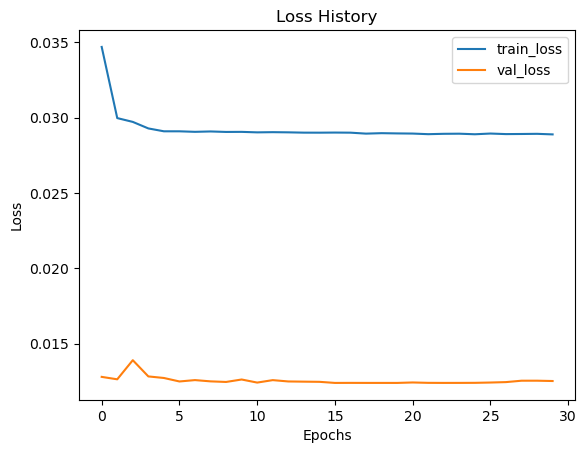

In [43]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

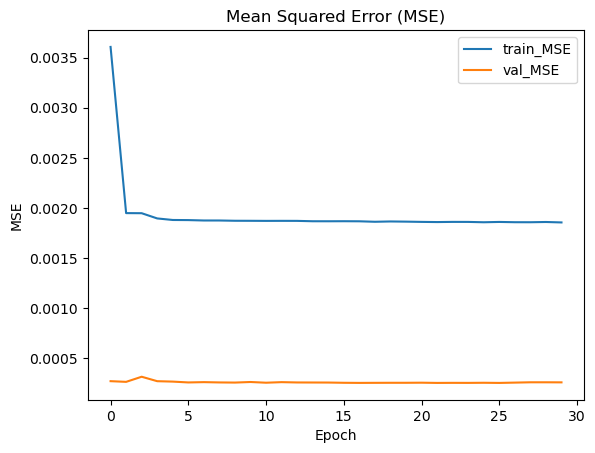

In [44]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

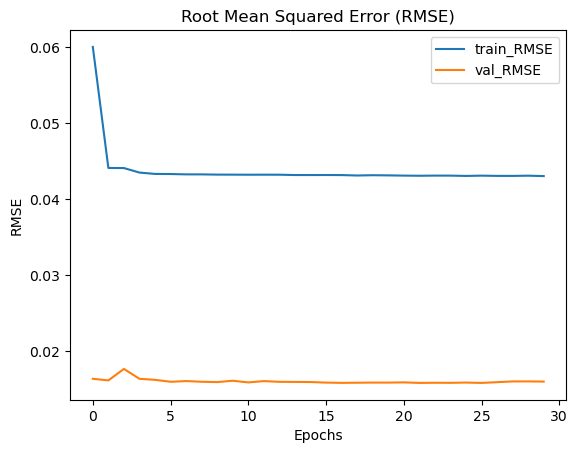

In [45]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

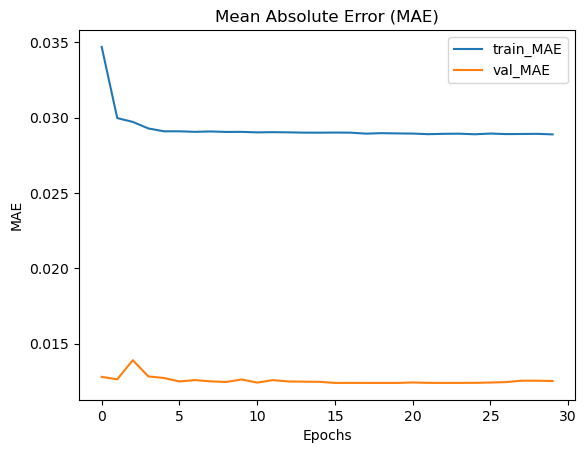

In [46]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

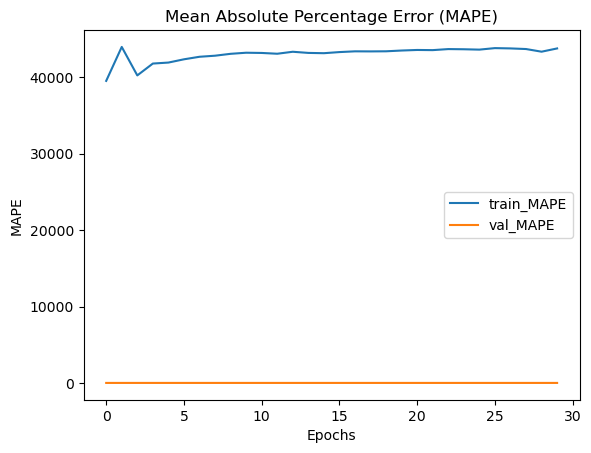

In [47]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-14 19:02:49.072702: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7598, 4, 2)
Labels Shape: (7598, 1, 1)
Prediction Shape: (7598, 1, 10)


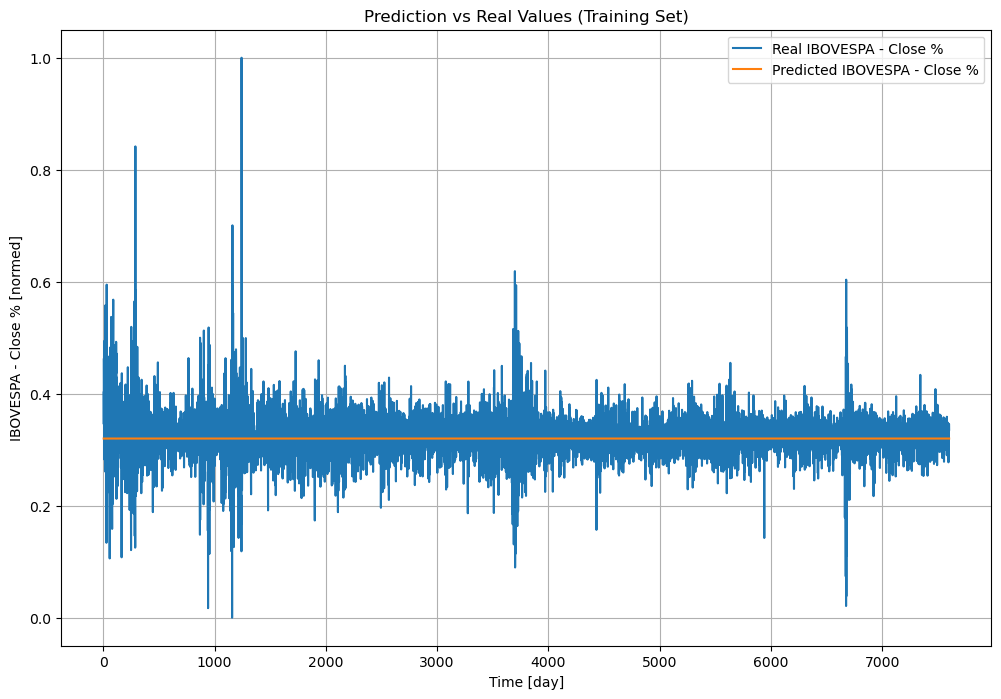

In [48]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (257, 4, 2)
Labels Shape: (257, 1, 1)
Prediction Shape: (257, 1, 10)


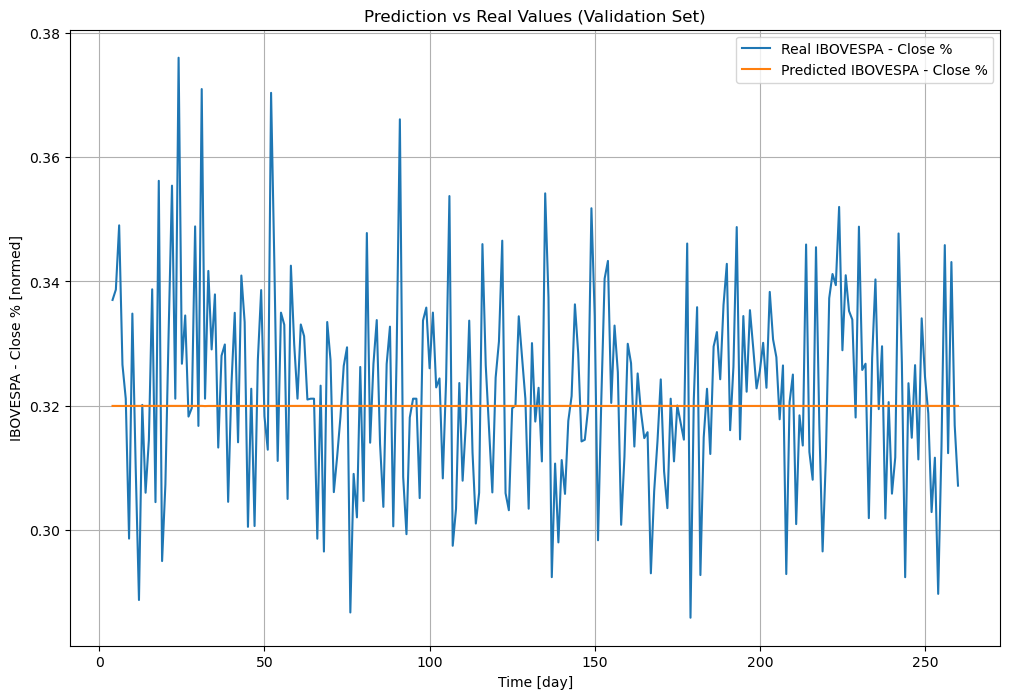

In [49]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (125, 4, 2)
Labels Shape: (125, 1, 1)
Prediction Shape: (125, 1, 10)


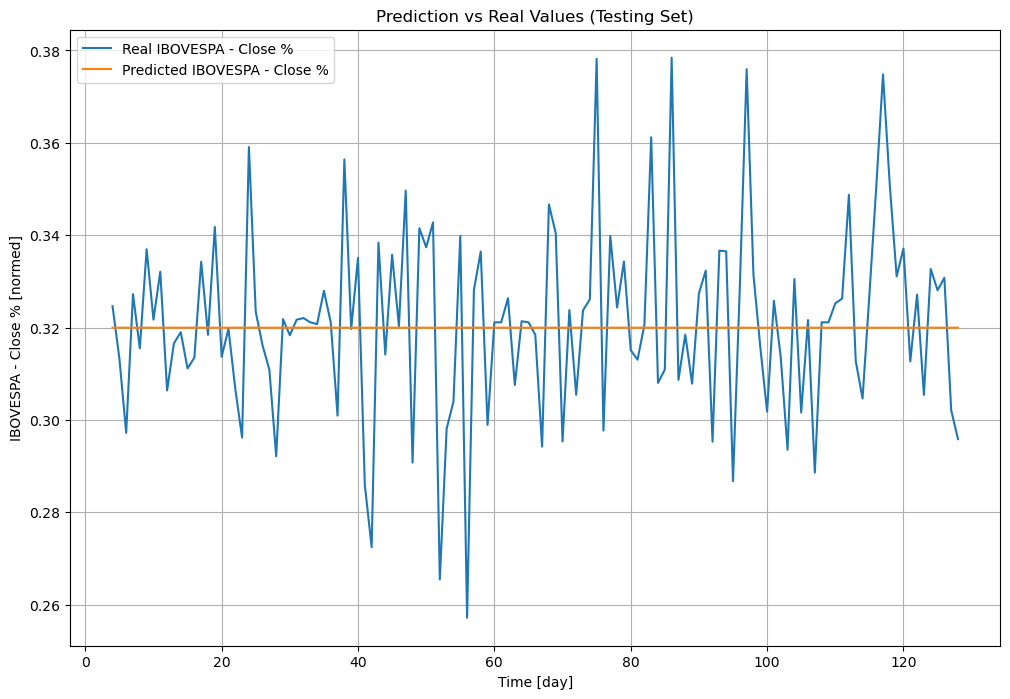

In [50]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

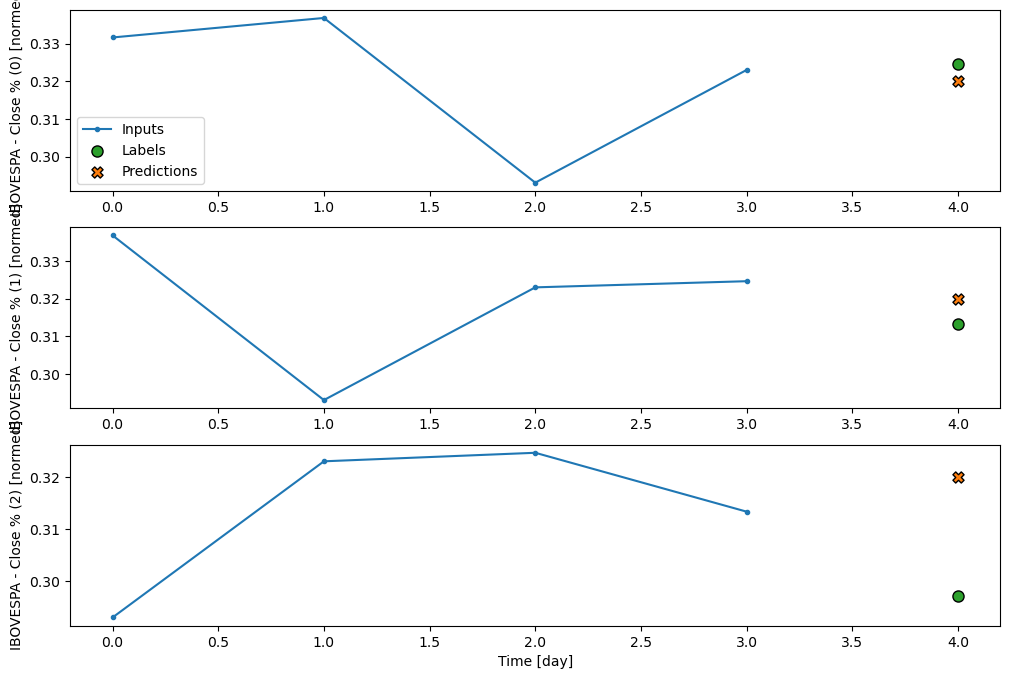

In [51]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [52]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:1m:0s:508ms


In [53]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


array([[[0.3199812 , 0.3199812 , 0.3199812 , ..., 0.3199812 ,
         0.3199812 , 0.3199812 ]],

       [[0.3199729 , 0.3199729 , 0.3199729 , ..., 0.3199729 ,
         0.3199729 , 0.3199729 ]],

       [[0.31997612, 0.31997612, 0.31997612, ..., 0.31997612,
         0.31997612, 0.31997612]],

       ...,

       [[0.3199775 , 0.3199775 , 0.3199775 , ..., 0.3199775 ,
         0.3199775 , 0.3199775 ]],

       [[0.31997114, 0.31997114, 0.31997114, ..., 0.31997114,
         0.31997114, 0.31997114]],

       [[0.31997848, 0.31997848, 0.31997848, ..., 0.31997848,
         0.31997848, 0.31997848]]], shape=(125, 1, 10), dtype=float32)

In [54]:
prediction.shape

(125, 1, 10)

Salvar e carregar modelo

In [55]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')